In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [4]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6

In [5]:
from src import data

In [6]:
# The conversion to `pd.Categorical` fails spectacularly, so we will do without it.
df = pd.read_spss(f"{data.data_root}/external/COSMO/INSERM.sav", convert_categoricals=False) 

In [7]:
metadata = pd.read_csv(f"{data.data_root}/external/COSMO/variablen_Welle_9_INSERM_translated.csv")

In [82]:
# 1 yes, 2 no, 3 does not apply
colnames_yn = [
    'USE_HANDWASH',
    'USE_TOUCHING',
    'USE_SANITIZER',
    'USE_HOME',
    'USE_COVERING',
    'USE_CLOSE_CONTACT',
    'USE_MASK',
    'USE_HANDWASH20',
    'USE_HANDSHAKE',
    'USE_SPACE150',
    'USE_SQUAR_WITHOUT',
    'USE_SQUAR_WITH',
    'USE_AVOID',
    'USE_AVOID_PARTY',
    'USE_CONTACT2P',
    'USE_NEC_WAYS',
    'USE_POSTAL',
    'USE_SUPPLEMETS',
    'USE_CONTACT_HH',
    'USE_OTHER1\nUSE_OTHER2',
    'USE_NATURAL',
    'USE_EATING',
    'USE_ALGAE',
    'USE_MEAT',
    'USE_FLUVACCINE',
    'USE_EXERCISE',
    'USE_CROWD',
    'USE_ABX',
    'USE_GINGER',
    'USE_HOMEO',
    'USE_PNEUVAX',

]

# 1 Not applicable
# 2 Never
# 3 Rarely
# 4 Sometimes
# 5 Frequently
# 6 Always
colnames_freq = [
    'USE2_TOUCHING',
    'USE2_SANITIZER',
    'USE2_HOME',
    'USE2_COVERING',
    'USE2_CLOSE_CONTACT',
    'USE2_MASK',
    'USE2_HANDWASH20',
    'USE2_HANDSHAKE',
    'USE2_SPACE150',
    'USE2_SQUAR_WITHOUT',
    'USE2_SQUAR_WITH',
    'USE2_AVOID',
    'USE2_AVOID_PARTY',
    'USE2_CONTACT2P',
    'USE2_NEC_WAYS',
    'USE2_POSTAL',
    'USE2_SUPPLEMETS',
    'USE2_CONTACT_HH',
    'USE2_FRIENDS',
    'USE2_TRIPS',
    'USE2_OTHER1\nUSE2_OTHER2',
]

In [17]:
metadata[
    metadata['Variablenname'].isin(colnames_yn)
][
    ['Variablenname', 'Text of question (translated)']
]

,Variablenname,Text of question (translated)
85,USE_HANDWASH,frequently washed hands
86,USE_TOUCHING,"does not touch your eyes, nose and mouth with ..."
87,USE_SANITIZER,Disinfectants used
88,USE_HOME,"Stayed home when they were sick (for example, ..."
89,USE_COVERING,cover your mouth when coughing
90,USE_CLOSE_CONTACT,avoid close contact with infected people
91,USE_MASK,A facemask / down shaft 5: Wear a respirator
92,USE_HANDWASH20,washed 20 seconds hands
93,USE_HANDSHAKE,Avoided shaking hands
94,USE_SPACE150,"In public, a distance of 1.50 Meten adhered to..."


In [44]:
df_yn = df.filter(items=['TIME']+colnames_yn,axis=1).replace(dict(zip(colnames_yn, [{3.0: np.nan}]*len(colnames_yn))))
df_yn

,TIME,USE_HANDWASH,USE_TOUCHING,USE_SANITIZER,USE_HOME,USE_COVERING,USE_CLOSE_CONTACT,USE_MASK,USE_HANDWASH20,USE_HANDSHAKE,USE_SPACE150,USE_SQUAR_WITHOUT,USE_SQUAR_WITH,USE_AVOID,USE_AVOID_PARTY,USE_CONTACT2P,USE_NEC_WAYS,USE_CONTACT_HH,USE_CROWD
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9180,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9181,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9182,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9183,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
pd.crosstab(df_yn['TIME'], df_yn['USE_MASK'], normalize='index')[1.0].to_frame(name='USE_MASK')

,USE_MASK
TIME,
1.0,0.079137
2.0,0.055310
3.0,0.078512
4.0,0.130183
5.0,0.261905
6.0,0.292008


In [76]:
df_yn.columns

Index(['TIME', 'USE_HANDWASH', 'USE_TOUCHING', 'USE_SANITIZER', 'USE_HOME',
       'USE_COVERING', 'USE_CLOSE_CONTACT', 'USE_MASK', 'USE_HANDWASH20',
       'USE_HANDSHAKE', 'USE_SPACE150', 'USE_SQUAR_WITHOUT', 'USE_SQUAR_WITH',
       'USE_AVOID', 'USE_AVOID_PARTY', 'USE_CONTACT2P', 'USE_NEC_WAYS',
       'USE_CONTACT_HH', 'USE_CROWD'],
      dtype='object')

In [49]:
df_freq = df.filter(items=['TIME']+colnames_freq,axis=1).replace(dict(zip(colnames_freq, [{1.0: np.nan}]*len(colnames_freq))))
df_freq

,TIME,USE2_TOUCHING,USE2_SANITIZER,USE2_HOME,USE2_COVERING,USE2_CLOSE_CONTACT,USE2_MASK,USE2_HANDWASH20,USE2_HANDSHAKE,USE2_SPACE150,USE2_SQUAR_WITHOUT,USE2_SQUAR_WITH,USE2_AVOID,USE2_AVOID_PARTY,USE2_CONTACT2P,USE2_NEC_WAYS,USE2_CONTACT_HH,USE2_FRIENDS,USE2_TRIPS
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9180,9.0,4.0,3.0,NaN,6.0,6.0,4.0,6.0,5.0,5.0,NaN,NaN,5.0,6.0,5.0,5.0,NaN,4.0,6.0
9181,9.0,5.0,4.0,NaN,NaN,NaN,3.0,5.0,6.0,4.0,NaN,NaN,5.0,6.0,6.0,4.0,NaN,4.0,NaN
9182,9.0,5.0,4.0,6.0,6.0,NaN,5.0,5.0,6.0,6.0,NaN,NaN,5.0,6.0,5.0,5.0,NaN,5.0,6.0
9183,9.0,5.0,5.0,6.0,5.0,6.0,5.0,5.0,6.0,5.0,5.0,6.0,6.0,6.0,5.0,5.0,NaN,5.0,6.0


In [59]:
pd.crosstab(df_freq['TIME'], df_freq['USE2_MASK'], normalize='index').loc[:,[5.0,6.0]].sum(axis=1)

TIME
7.0    0.244014
8.0    0.338655
9.0    0.604145
dtype: float64

In [70]:
pd.concat(
    [
        df_impl,
        pd.crosstab(df_freq['TIME'], df_freq['USE2_MASK'], normalize='index').loc[:,[5.0,6.0]].sum(axis=1).to_frame(name='USE2_MASK'),
    ],
    axis=1
)

,USE_MASK,USE2_MASK
TIME,,
1.0,0.079137,NaN
2.0,0.055310,NaN
3.0,0.078512,NaN
4.0,0.130183,NaN
5.0,0.261905,NaN
6.0,0.292008,NaN
7.0,NaN,0.244014
8.0,NaN,0.338655
9.0,NaN,0.604145


In [85]:
df_col_impl = []
for colname in colnames_yn:
    if colname in df_yn.columns:
        df_col_impl.append(
            pd.crosstab(df_yn['TIME'], df_yn[colname], normalize='index')[1.0].to_frame(name=colname)
        )
for colname in colnames_freq:
    if colname in df_freq.columns:
        df_col_impl.append(
            pd.crosstab(df_freq['TIME'], df_freq[colname], normalize='index').loc[:,[5.0,6.0]].sum(axis=1).to_frame(name=colname)
        )
    
df_impl = pd.concat( df_col_impl, axis=1)

In [86]:
df_impl

,USE_HANDWASH,USE_TOUCHING,USE_SANITIZER,USE_HOME,USE_COVERING,USE_CLOSE_CONTACT,USE_MASK,USE_HANDWASH20,USE_HANDSHAKE,USE_SPACE150,...,USE2_SPACE150,USE2_SQUAR_WITHOUT,USE2_SQUAR_WITH,USE2_AVOID,USE2_AVOID_PARTY,USE2_CONTACT2P,USE2_NEC_WAYS,USE2_CONTACT_HH,USE2_FRIENDS,USE2_TRIPS
TIME,,,,,,,,,,,,,,,,,,,,,
1.0,0.947585,0.786228,0.578623,0.541624,0.901336,0.724563,0.079137,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,0.908218,0.764009,0.604055,0.539189,0.911894,0.794366,0.055310,0.867304,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,0.858425,0.698094,0.743462,0.952781,0.898904,0.078512,0.947421,0.939484,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,0.868253,0.689338,0.767538,0.958293,0.936424,0.130183,0.959350,0.972702,0.958979,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,0.874251,0.777223,0.780781,0.954214,0.929496,0.261905,0.942043,0.970472,0.966370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,0.861554,0.753000,0.771822,0.953830,0.917511,0.292008,0.951677,0.973108,0.960669,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.911067,0.613483,0.649077,0.815000,0.878721,0.838912,0.855446,0.775826,NaN,NaN
8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.923771,0.598039,0.635870,0.782158,0.871379,0.763754,0.826220,0.727370,NaN,NaN
9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.909543,0.718676,0.720988,0.779919,0.896667,0.808668,0.847305,NaN,0.759429,0.934354


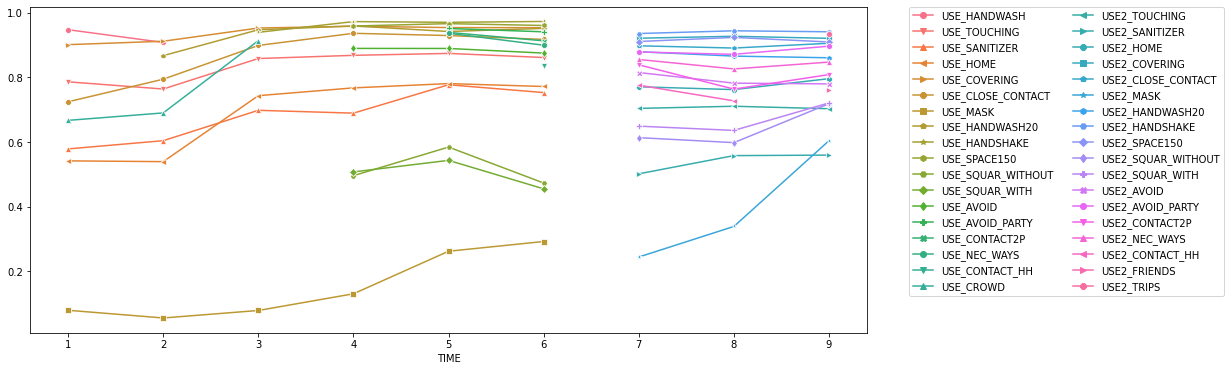

In [108]:
#seaborn can't do this automatically for some reason (╯°□°)╯︵ ┻━┻ 
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
manymarkers = filled_markers*3

sns.lineplot(data=df_impl,dashes=False, markers=manymarkers[:df_impl.columns.size])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=2)

In [109]:
import os

In [123]:
df_behav = pd.read_csv(
    os.path.join(data.data_root,'processed','germany_cosmo_behav.csv'),
    parse_dates=['date']
).set_index('date')
df_behav

,carry_mask,avoid_public_places,keep_distance,wash_hands,avoid_parties
date,,,,,
2020-03-03,8,NaN,NaN,NaN,NaN
2020-03-10,6,NaN,NaN,87.0,NaN
2020-03-17,8,NaN,NaN,95.0,NaN
2020-03-24,13,89.0,96.0,96.0,NaN
2020-03-31,26,89.0,97.0,94.0,95.0
2020-04-07,29,88.0,96.0,95.0,94.0
2020-04-14,24,82.0,91.0,88.0,88.0
2020-04-21,34,78.0,92.0,87.0,87.0
2020-04-28,60,78.0,91.0,86.0,90.0


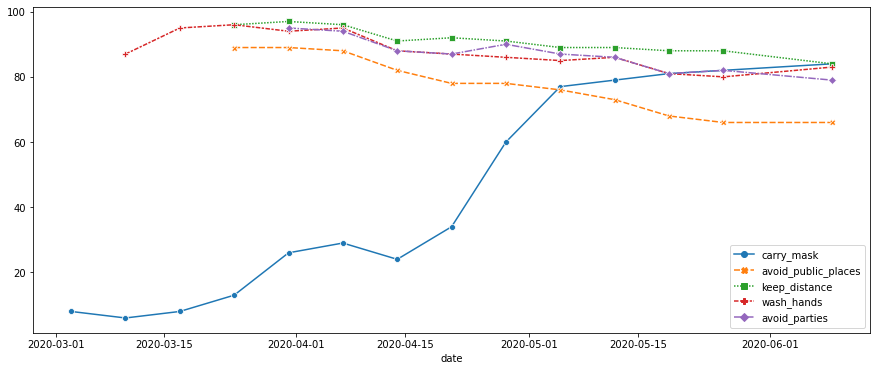

In [124]:
sns.lineplot(data=df_behav, markers=True)
